In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
nltk.download('stopwords')
nltk.download('punkt')
import re
def harfdegistir(cumle):
    listcumle0 = list(cumle)
    for i in range(0,len(listcumle0)):
        if listcumle0[i] == "ü":
            listcumle0[i] = "u"
        elif listcumle0[i] == "Ü":
            listcumle0[i] = "U"
        elif listcumle0[i] == "ö":
            listcumle0[i] = "o"
        elif listcumle0[i] == "Ö":
            listcumle0[i] = "O"
        elif listcumle0[i] == "İ":
            listcumle0[i] = "I"
        elif listcumle0[i] == "ç":
            listcumle0[i] = "c"
        elif listcumle0[i] == "Ç":
            listcumle0[i] = "C"
        elif listcumle0[i] == "ğ":
            listcumle0[i] = "g"
        elif listcumle0[i] == "Ğ":
            listcumle0[i] = "G"
        elif listcumle0[i] == "ş":
            listcumle0[i] = "s"
        elif listcumle0[i] == "Ş":
            listcumle0[i] = "S"
        elif listcumle0[i] == "ı":
            listcumle0[i] = "i"

    cumle0 = ''.join(listcumle0)

    cumle1 = re.sub("[^a-zA-Z]", " ", cumle0)
    cumle2 = cumle1.lower()

    cumle2 = nltk.word_tokenize(cumle2)
    cumle2 = [word for word in cumle2 if not word in set(stopwords.words("turkish"))]

    cumle3 = " ".join(cumle2)

    return cumle3
df = pd.read_csv('haberler.csv')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df.head(20)

,category,text
0,siyaset,3 milyon ile ön seçim vaadi mhp nin 10 olağan...
1,siyaset,mesut_yılmaz yüce_divan da ceza alabilirdi pr...
2,siyaset,disko lar kaldırılıyor başbakan_yardımcısı ar...
3,siyaset,sarıgül anayasa_mahkemesi ne gidiyor mustafa_...
4,siyaset,erdoğan idamın bir haklılık sebebi var demek ...
5,siyaset,hüseyin_çelik bunu kim yaparsa pahalıya ödeti...
6,siyaset,yılmaz_özdil e bira cevabı ak_parti milletvek...
7,siyaset,bakanlıklar lale_devri nde mhp ankara milletv...
8,siyaset,iktidarın gerçek niyeti ortaya çıktı chp gene...
9,siyaset,vural dan karadayı yorumu mhp_grup_başkanveki...


In [4]:
df= df.dropna()
SonGorus = []
X = df["text"].values
for i in range(len(X)):
    X_ = harfdegistir(X[i])
    SonGorus.append(X_)
df['text'] = SonGorus
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
max_len = 100  # Cümlenin maksimum uzunluğu
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
from tensorflow.keras.layers import Bidirectional, Dropout

# Modeli oluştur
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.2))
model.add(Dense(7, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
verim = model.fit(X_train_pad, y_train_encoded, epochs=10, validation_data=(X_test_pad, y_test_encoded))

Epoch 1/10
123/123 [==============================] - 91s 667ms/step - loss: 1.7616 - accuracy: 0.2791 - val_loss: 1.4157 - val_accuracy: 0.4510
Epoch 2/10
123/123 [==============================] - 85s 689ms/step - loss: 1.1087 - accuracy: 0.6130 - val_loss: 0.9347 - val_accuracy: 0.6673
Epoch 3/10
123/123 [==============================] - 86s 698ms/step - loss: 0.8115 - accuracy: 0.7362 - val_loss: 0.9393 - val_accuracy: 0.6694
Epoch 4/10
123/123 [==============================] - 79s 646ms/step - loss: 0.6165 - accuracy: 0.7995 - val_loss: 0.8117 - val_accuracy: 0.7245
Epoch 5/10
123/123 [==============================] - 85s 689ms/step - loss: 0.5573 - accuracy: 0.8270 - val_loss: 0.8039 - val_accuracy: 0.7245
Epoch 6/10
123/123 [==============================] - 81s 658ms/step - loss: 0.4656 - accuracy: 0.8556 - val_loss: 0.9137 - val_accuracy: 0.7316
Epoch 7/10
123/123 [==============================] - 86s 700ms/step - loss: 0.5203 - accuracy: 0.8316 - val_loss: 0.7867 - val_ac

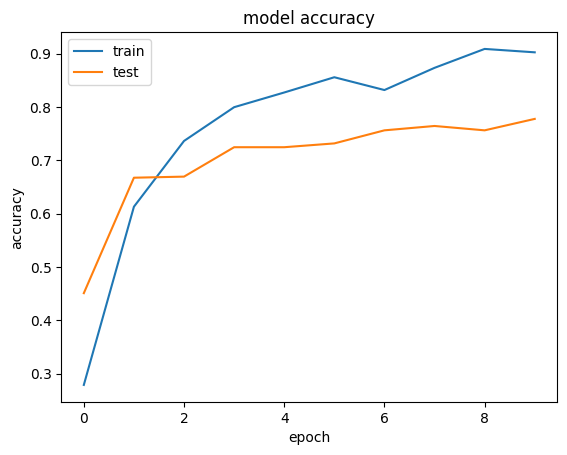

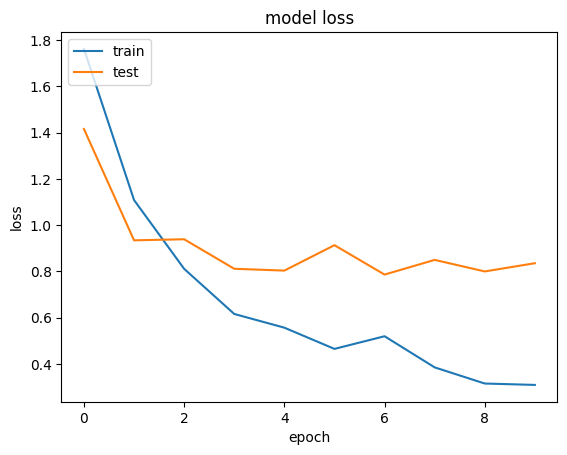

In [11]:
import matplotlib.pyplot as plt

plt.plot(verim.history['accuracy'])
plt.plot(verim.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(verim.history['loss'])
plt.plot(verim.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
hbr  = pd.read_csv('scraped_data.csv')

In [24]:
hbr = hbr.dropna()
hbr

,id,Title,link
0,1,Gazze'de her 10 dakikada 1 çocuk ölüyor,ensonhaber.com/gundem/dsoden-kahreden-aciklama...
2,3,Fenomenlere büyük darbe! Özlem Öz'den kayyum s...,ensonhaber.com/gundem/fenomenlere-buyuk-darbe-...
3,4,Emniyet teşkilatına 10 bin polis alınacak! Duy...,ensonhaber.com/gundem/emniyet-teskilatina-10-b...
5,6,Sağanak yağmur İstanbul'a can suyu oldu,ensonhaber.com/gundem/istanbul-barajlarinda-so...
6,7,Cumhurbaşkanı Erdoğan Katar’dan ayrıldı,ensonhaber.com/gundem/cumhurbaskani-erdogan-ka...
7,8,İsias Oteli iddianamesi kabul edildi,ensonhaber.com/gundem/depremde-72-kisi-enkazin...
9,10,Kurşun yağmurundan sonra ilk ifade,ensonhaber.com/gundem/is-yerine-kursun-yagmist...
10,11,Mısır Çarşısı'nda vatandaşlarla buluştu,ensonhaber.com/gundem/cumhurbaskani-yardimcisi...
11,12,Ayhan Akman'dan Seçil'e yeni sözler,ensonhaber.com/gundem/secilin-agina-dusen-ayha...
12,13,İyi Parti'nin seçime tek girme kararına Özgür ...,ensonhaber.com/gundem/iyi-partinin-secime-tek-...


In [25]:
sonhaber = []
H = hbr["Title"].values
for i in range(len(H)):
    H_ = harfdegistir(H[i])
    sonhaber.append(H_)

In [26]:
hbr['Title'] = sonhaber

In [27]:
hbr

,id,Title,link
0,1,gazze dakikada cocuk oluyor,ensonhaber.com/gundem/dsoden-kahreden-aciklama...
2,3,fenomenlere buyuk darbe ozlem oz den kayyum so...,ensonhaber.com/gundem/fenomenlere-buyuk-darbe-...
3,4,emniyet teskilatina bin polis alinacak duyurul...,ensonhaber.com/gundem/emniyet-teskilatina-10-b...
5,6,saganak yagmur istanbul a can suyu oldu,ensonhaber.com/gundem/istanbul-barajlarinda-so...
6,7,cumhurbaskani erdogan katar dan ayrildi,ensonhaber.com/gundem/cumhurbaskani-erdogan-ka...
7,8,isias oteli iddianamesi kabul edildi,ensonhaber.com/gundem/depremde-72-kisi-enkazin...
9,10,kursun yagmurundan sonra ilk ifade,ensonhaber.com/gundem/is-yerine-kursun-yagmist...
10,11,misir carsisi nda vatandaslarla bulustu,ensonhaber.com/gundem/cumhurbaskani-yardimcisi...
11,12,ayhan akman dan secil e yeni sozler,ensonhaber.com/gundem/secilin-agina-dusen-ayha...
12,13,iyi parti nin secime tek girme kararina ozgur ...,ensonhaber.com/gundem/iyi-partinin-secime-tek-...


No charts were generated by quickchart


In [28]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
sample_seq = tokenizer.texts_to_sequences(hbr['Title'])
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')

In [ ]:
from sklearn.preprocessing import LabelEncoder
predictions = model.predict(sample_pad)
predicted_classes = predictions.argmax(axis=-1)
predicted_categories = le.inverse_transform(predicted_classes)
# Tahminleri DataFrame'e ekleyerek kategorize edilmiş veriyi oluşturma
result_df = pd.DataFrame({'İçerik': hbr['Title'], 'Tahmin': predicted_categories})
result_df.to_csv('haber_tahminler.csv', index=False)
# Elde edilen sonuçları görüntüleme
print(result_df)